## 사이킷런 소개와 특징

Scikit-learn은 머신러닝 라이브러리중에 가장 많이 사용되고 있다. 최근 텐서플로, 케라스 등 딥러닝 전문 라이브러리가 있어 관심이 줄어들지만 데이터 분석가가 많이 의존하는 댚표적 ML 라이브러리이다.

특징:

- 다른 머신러닝 라이브러리가 사이킷런 스타일 API를 지향할 정도로 파이썬 같은 API 제공.
- 머신러닝 위한 다양한 알고리즘 개발을 위한 편리한 프레임워크와 API 제공
- 오랜 시간 실전 환경에서 사용되온 성숙한 라이브러리

### 필수 라이브러리와 도구들

이 코드를 실행하려면 numpy, scipy, scikit-learn, matplotlib, pandas와 pillow 패키지가 필요합니다. 결정 트리와 신경망 구조에 대한 그래프를 그리려면 graphviz도 필요합니다.

- Anaconda 를 설치하면 기본으로 사이킷런까지 설치된ㄷ.

#### conda를 사용한 패키지 설치

설치된 파이썬이 있다면 conda 패키지 매니저를 사용하여 다음 명령을 실행하면 필요한 패키지를 모두 얻을 수 있습니다.

```terminal
$ conda install numpy scipy scikit-learn matplotlib pandas pillow graphviz python-graphviz
```

#### pip를 사용한 패키지 설치

파이썬이 있고 pip를 사용하여 패키지를 설치하려면 다음 명령을 사용합니다.

```terminal
$ pip install numpy scipy scikit-learn matplotlib pandas pillow graphviz
```

여기서 테스트한 도구들 버전 정보 확인,

NumPy: 1.18.1 / SciPy: 1.4.1 / Matplotlib: 3.0.2 / Sklearn: 0.22.1

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

print(f"NumPy: {np.__version__} / SciPy: {sp.__version__}"
      f" / Matplotlib: {matplotlib.__version__} / Sklearn: { sklearn.__version__}")

NumPy: 1.19.2 / SciPy: 1.5.2 / Matplotlib: 3.3.2 / Sklearn: 0.23.2


##### 사용버전

```python
print(f"NumPy: {np.__version__} / SciPy: {sp.__version__}"
      f" / Matplotlib: {matplotlib.__version__} / Sklearn: { sklearn.__version__}")
```

테스트한 버전: NumPy: 1.18.1 / SciPy: 1.4.1 / Matplotlib: 3.0.2 / Sklearn: 0.22.1
 

In [2]:
"""
시스템에 따라 기본 한글 폰트를 읽어 들인다.
"""
import platform
from matplotlib import font_manager, rc
import re

pattern = re.compile("Linux|Ubuntu")
    
# 폰트를 적재한다.
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# elif pattern.search(platform.platform()):
elif 'Ubuntu' in platform.platform() or 'Linux' in platform.platform():
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif 'SuSE' in platform.platform():
    path = "/usr/share/fonts/truetype/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

---

# 첫 번째 - 의사결정 트리를 이용한 붓꽃의 품종 분류


scikit-learn 에는 전통적인 데이터 세트로 붓꽃 데이터를 제공하고 있다.  이 데이터는 전문 식물학자가 식별한 종인  Setosa, Versicolor, Virginica 에 속하는 붓꽃을 측정한 결과를 붓꽃에 대한 꽃잎(petal)의 폭과 길이, 꽃받침(sepal)의 폭과 길이가 있다. 이를 학습을 통해 어떤 붓꽃 데이터 세트로 붓꽃의 품종을 분류(classification)하는 것이다.

<img src='https://tensorflowkorea.files.wordpress.com/2017/06/1-2.png' width='250'>

어떤 종에 대한 데이터 세트를 아는 상태에서 새로 측정한 데이터를 입력해서 어떤 종의 꽃인지 예측하는 학습 가능한 머신러닝 모델을 구축하는 것이다. 결과적으로 새로 측정한 데이터로 붗꽃임을 알수 있다. 

### 사이킷런 데이터 세트

`sklearn.datasets` 모듈은 사이킷런에서 제공하는 데이트 세트, 붓꽃 데이터는 아래 같이 구성되어 있다.

Data features (붓꽃 특징)
 - Sepal length
 - Sepal width
 - Petal length
 - Petal width

Data label(붗꽃 품종)
 - Setosa
 - Vesicolor
 - virginica





 - sklearn.tree : 트리 기반 ML  알고리즘 클래스 
 - sklearn.model_selectino: 학습 데이터, 검증 데이터, 예측 데이터로 분리하나 최적의 하이퍼 파라미터로 평가하기 위한 모듈
 - 하이퍼 파라미터: 머신러닝 알로기즘 별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭하며 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있다.


붓꽃 데이터 세트에 대한 각 키 값에 대한 비교.



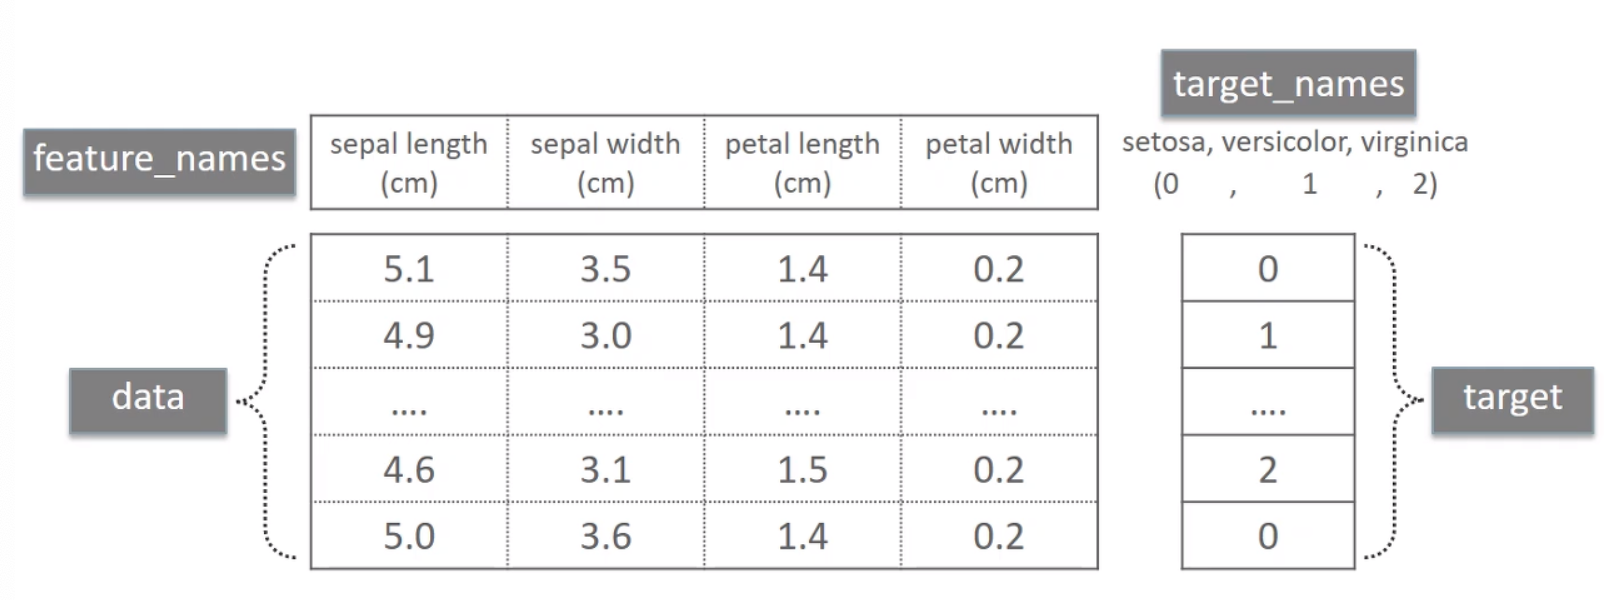


In [5]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

결과 데이터세트는 *[sklearn.utils.Bunch](https://scikit-learn.org/dev/modules/generated/sklearn.utils.Bunch.html)* 객체로 반환되는데 이것은 딕셔너리와 유사하다. keys와 values 를 가지고  다음은 키 값 이다:
 - target_names: 꽃의 종을 포함한 문자열 배열 - 여기서 예측하고자 하는 것.
 - feature_names: 각각의 특징을 묘사하는 문자열 리스트
 - data: 데이터는 target, data 필드에 포함되어 있지만 numpy array로 꽃잎/꽃받침의 크기가 있다.
 - target: 데이터 배열에서 행은 꽃에 해당하고, 컬럼은 각 꽃이 가진 측정치이다.

In [6]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
iris_dataset.data.shape

(150, 4)

In [10]:
iris_dataset.data[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [11]:
iris_dataset.target.shape

(150,)

In [14]:
iris_dataset.target[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
df = pd.DataFrame(data=iris_dataset['data'],
                 columns=iris_dataset['feature_names'])

In [18]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [19]:
df['label'] = iris_dataset['target']
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 첫 번째 머신러닝 모델: 의사결정 트리

사이킷런에서 제공하는 붓꽃 데이터 세트를 이용해서 사이킷런의 의사결정트리 클래스 DecisionTreeClassifier 를 이용해 학습을 진행해 보자

머신러닝으로 붓꽃 데이터 세트를 분리해 학습과정을 정리하면:

1. 데이터 세트 분리: 데이터를 
   - 1) 학습 데이터와 
   - 2) 테스트 데이터로 분리
2. 모델 학습: 학습 데이터를 기반으로 ML 알고리즘으로 모델을 학습시킨다.
3. 예측 수행: 학습한 ML모델을 이용해 테스트 데이터의 분류(붓꽃 종료)를 예측
4. 평가: 예측된 결과를 테스트 데이터의 실제 결과 값을 비교해 ML 모델 성능을 평가.


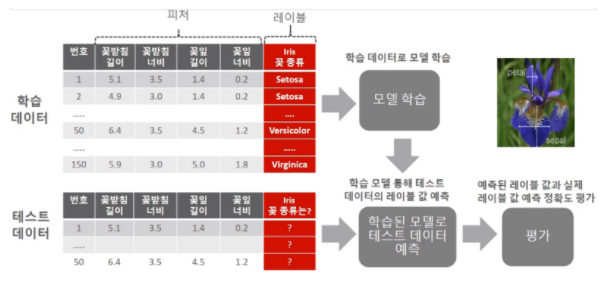

## 1. 데이터 세트 분리

iris_dataset 을 훈련과 테스트 세트로 나누는 작업을 해보자, 아래는 학습용 피처 데이터 세트를 X_train, 테스트용 피처 데이터 세트를 X_test 로 나누고 학습용 레이블 데이터 세트를 y_train, 테스트용 레이블 데이터 세트를 y_test로 나누어 주고 있다.

만약 섞지 않은 상태로 데이터 세트 뒤쪽 25%를 테스트 세트로 이용하면 그 데이터의 레이블은 모두 2가 된다.


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [21]:
print(f'X_train/y_train 크기 {X_train.shape} / {y_train.shape}')
print(f'X_test/y_test 크기 {X_test.shape} / { y_test.shape}')

X_train/y_train 크기 (112, 4) / (112,)
X_test/y_test 크기 (38, 4) / (38,)


### 시각화

In [24]:
df_X = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

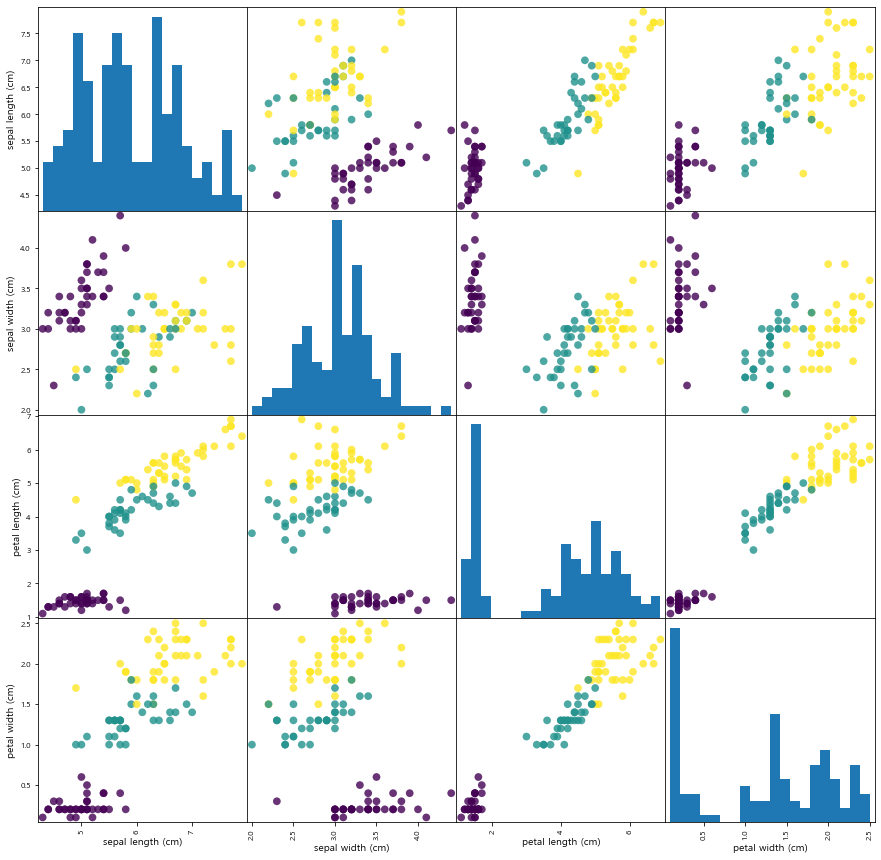

In [25]:
pd.plotting.scatter_matrix(df_X, 
                           c = y_train, 
                           figsize=(15, 15), 
                           marker='o',
                           hist_kwds={'bins': 20}, 
                           s=60, alpha=.8)
plt.show()

## 2. 결정트리 모델 학습

사이킷런의 결정트리 기반의 DecisionTreeClassifer 객체에서 fit()에 학습용 피처 데이터 속성과 결정 값 데이터 세트를 입력하면 학습을 한다.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

df_clf = DecisionTreeClassifier(random_state=11)

# 학습수행
df_clf.fit(X_train, y_train)

## 3. 예측 수행

이제 의사결정트리 기반의 DecisionTreeClassifier 객체는 학습 데이터를 기반으로 학습이 완료되었다. 이렇게 학습된 결과를 이용해서 예측을 수행해보자.


In [ ]:
pred_clf = df_clf.predict(X_test)

## 4. 평가 - 예측성능

마지막 단계로 의사결정트리 DecisionTreeClassifier 의 예측 수행 결과를 기반으로 예측 성능을 평가해 보자.


In [ ]:
from sklearn.metrics import accuracy_score
print(f"예측 정확도: {accuracy_score(y_test, pred):.4f}")

# 두 번째 머신러닝 모델: K최근접 이웃 알고리즘

[K-최근접 이웃 알고리즘](https://ko.wikipedia.org/wiki/K-최근접_이웃_알고리즘)은 K-NN(K Nearest Neighbors) 으로 간단한 머신 러닝 알고리즘 중 하나이다. 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트 즉 **최근접 이웃**을 찾는다.[^1] 그런 다음에 찾은 훈련 데이터의 레이블을 새 데이터 포인트의 레이블로 저장한다.

K-최근접 이웃 알로리즘에서 k는 가장 가가운 이웃 하나가 아니라 **훈련 데이터에 대해 새로운 데이터 포인트에서 가장 가까운 *k*개의 이웃**을 찾는다는 의미이다. 그런 다음 이 이웃들의 클래스 중 빈도가 가장 높은 클래스를 예측값으로 사용한다. 여기서는 한 이웃만 사용할 것이다.


### 1.데이터 세트 분리

앞에서 분리한 붓꽃 데이터를 기본 25% 사용한다.

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### 2. 모델 학습

사이킷런 k-최근접 이웃 분류 알고리즘은 sklearn.neighbors.KNeighborsClassifier 클래스를 사용한다. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

그리고 훈련 모델을 만들려면 훈련용 과 테스트용 피처 데이터 세트를 fit 으로 적재한다.


In [ ]:

knn.fit(X_train, y_train)
knn.fit(X_train, y_train)

### 3. 예측 수행
학습된 모델에 테스트할 데이터를 제공해서 새로운 발견을 해보자. 예측은 학습 데이터가 아닌 다른 데이터를 사용하는데 여기서는 피처 테스트 데이터 세트 를 사용한다


In [ ]:
pred_knn = knn.predict(X_test)

print(f'피처 테스트 세트에 대한 예측: \n \
    {pred} \n\
    "예측한 이름: \n" \
    {iris_dataset["target_names"][pred]}')

### 4. 평가

피처의 테스트 데이터와 라벨을 위한 테스트 데이터가 얼마나 일치하는지 수행해 보자.


In [ ]:
from sklearn.metrics import accuracy_score

print(f"예측 정확도: {accuracy_score(y_test, pred_knn):.4f}")


In [ ]:
np.mean( pred_knn == y_test)

knn.score(X_test, y_test)



### 새 데이터에서 예측 수행

학습된 모델에 테스트할 데이터를 제공해서 새로운 발견을 해보자. 이제 이 모델을 이용해서 정확한 레이블을 모르는 새 데이터에 대해 예측을 만들 수 있다. 새로 발견한 붓꽃이 꽃받침 길이가 5cm, 폭이 2.9cm, 꽃잎 길이가 1cm, 폭이 0.2cm 인 붓꽃을 보았다면


In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]]) #꽃받침 길이, 폭 / 꽃잎 길이, 폭

# 예측 수행
knn_pred = knn.predict(X_new)
print(f'({knn_pred}) : {iris_dataset["target_names"][knn_pred]}')


In [ ]:
np.mean( knn_pred == y_test)